In [1]:
#Loading data
import pandas as pd
import numpy as np
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Loading data
data = load_boston()
data1 = pd.DataFrame(data.data, columns= data.feature_names)
data1['MDVAL'] = data.target
data1.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MDVAL
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


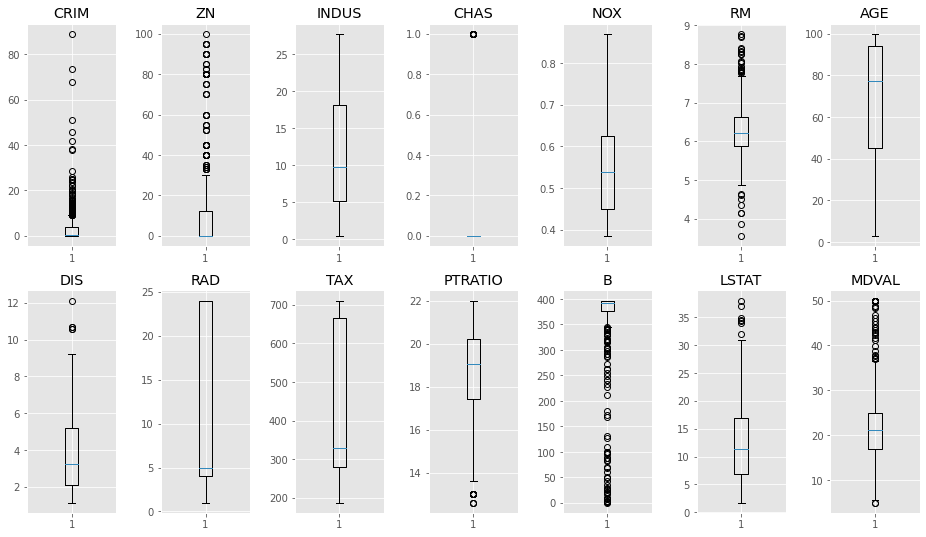

In [3]:
#Creating boxplots
plt.style.use('ggplot')
plt.figure(figsize=(16,9))
for i,j in enumerate(data1.columns):
    plt.subplot(2,7,i+1)
    plt.boxplot(data1[j]);
    plt.title(j)
plt.subplots_adjust(wspace=0.5)

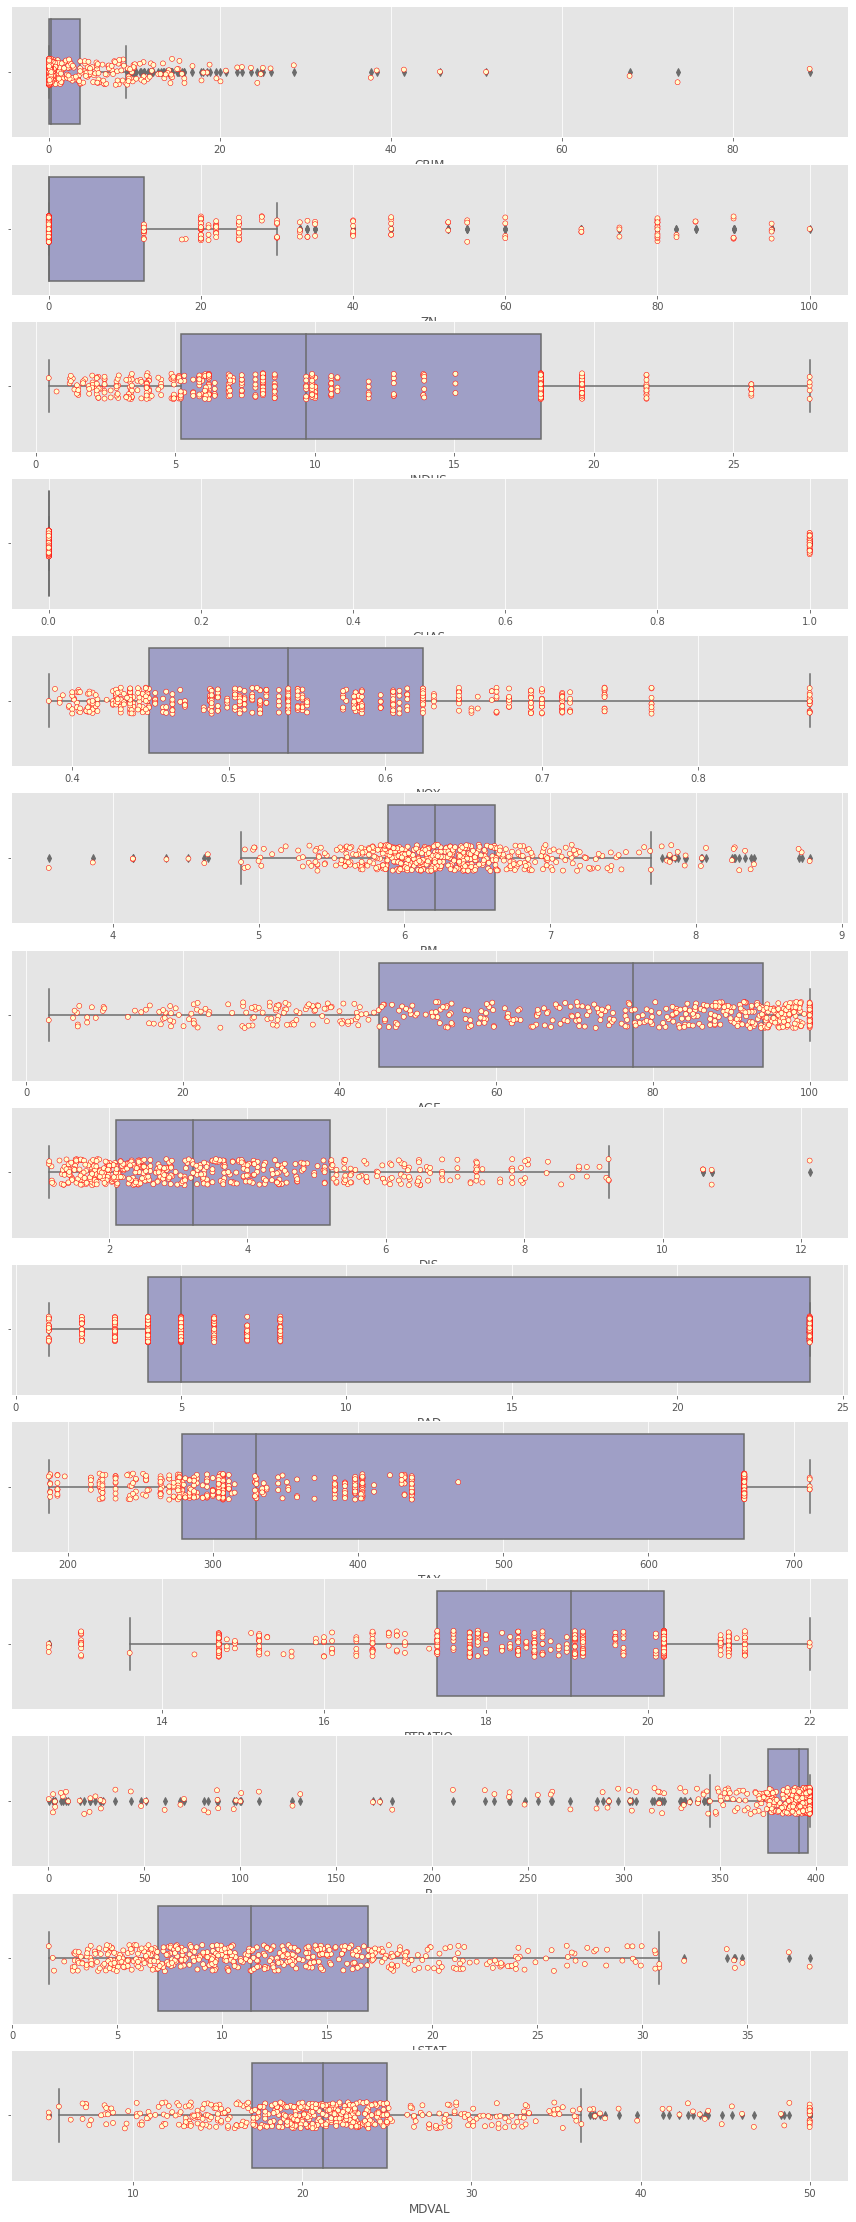

In [4]:
#Creating boxplots
plt.style.use('ggplot')
plt.figure(figsize=(15,40))
for i,j in enumerate(data1.columns):
    plt.subplot(14,1,i+1)
    sns.boxplot(x=data1[j], color='#9999cc');
    sns.stripplot(x=data1[j], color='#ffffcc',edgecolor='red',linewidth=0.5);

In [62]:
#Computing Q1, Q2 & IQR
Q1 = data1.quantile(0.25)
Q3 = data1.quantile(0.75)
IQR = Q3 - Q1

CRIM         3.595038
ZN          12.500000
INDUS       12.910000
CHAS         0.000000
NOX          0.175000
RM           0.738000
AGE         49.050000
DIS          3.088250
RAD         20.000000
TAX        387.000000
PTRATIO      2.800000
B           20.847500
LSTAT       10.005000
MDVAL        7.975000
dtype: float64

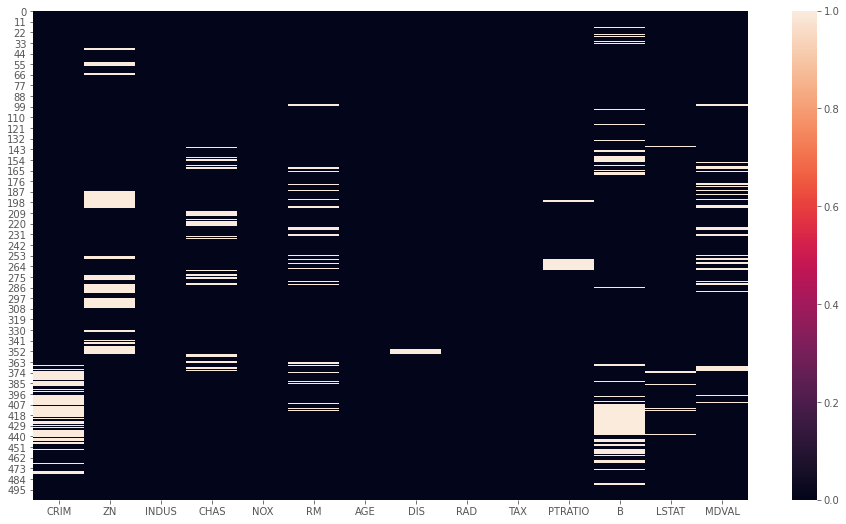

In [82]:
#Visualizing outliers
outliers_bool=(data1<Q1-(1.5*IQR)) | (data1>Q3+(1.5*IQR))
plt.figure(figsize=(16,9))
sns.heatmap(outliers);

In [84]:
#Extracting row numbers & column numbers
np.where((data1<Q1-(1.5*IQR)) | (data1>Q3+(1.5*IQR)))

(array([ 18,  25,  27,  32,  34,  39,  40,  54,  55,  56,  57,  65,  66,
         97,  97,  98,  98, 102, 118, 134, 141, 142, 145, 146, 151, 152,
        152, 153, 154, 154, 155, 155, 156, 157, 160, 160, 161, 162, 162,
        162, 163, 163, 163, 165, 166, 166, 167, 168, 169, 170, 179, 180,
        180, 182, 186, 186, 187, 188, 189, 190, 190, 191, 192, 193, 194,
        195, 195, 195, 196, 196, 197, 197, 198, 198, 199, 200, 201, 202,
        202, 203, 203, 203, 204, 204, 204, 208, 209, 210, 211, 212, 216,
        218, 219, 220, 221, 222, 224, 224, 225, 225, 226, 226, 228, 232,
        232, 233, 233, 234, 236, 253, 253, 254, 255, 256, 256, 257, 257,
        257, 258, 259, 260, 261, 261, 262, 262, 262, 263, 264, 265, 266,
        267, 267, 267, 268, 268, 269, 273, 274, 274, 275, 276, 276, 277,
        277, 278, 280, 280, 282, 282, 283, 283, 283, 283, 284, 285, 286,
        286, 287, 288, 289, 290, 291, 291, 292, 298, 299, 300, 301, 302,
        303, 304, 305, 306, 307, 331, 332, 341, 343

In [88]:
#Extracting only outliers in the data
data1.iloc[np.where((data1<Q1-(1.5*IQR)) | (data1>Q3+(1.5*IQR)))[0],[0, 1, 3, 5, 7, 10, 11, 12, 13]]

,CRIM,ZN,CHAS,RM,DIS,PTRATIO,B,LSTAT,MDVAL
18,0.80271,0.0,0.0,5.456,3.7965,21.0,288.99,11.69,20.2
25,0.84054,0.0,0.0,5.599,4.4546,21.0,303.42,16.51,13.9
27,0.95577,0.0,0.0,6.047,4.4534,21.0,306.38,17.28,14.8
32,1.38799,0.0,0.0,5.950,3.9900,21.0,232.60,27.71,13.2
34,1.61282,0.0,0.0,6.096,3.7598,21.0,248.31,20.34,13.5
...,...,...,...,...,...,...,...,...,...
477,15.02340,0.0,0.0,5.304,2.1007,20.2,349.48,24.91,12.0
478,10.23300,0.0,0.0,6.185,2.1705,20.2,379.70,18.03,14.6
479,14.33370,0.0,0.0,6.229,1.9512,20.2,383.32,13.11,21.4
489,0.18337,0.0,0.0,5.414,1.7554,20.1,344.05,23.97,7.0


In [94]:
#Removing outliers from the data
data1.drop(np.where((data1<Q1-(1.5*IQR)) | (data1>Q3+(1.5*IQR)))[0],
           axis=0, 
           inplace = True)

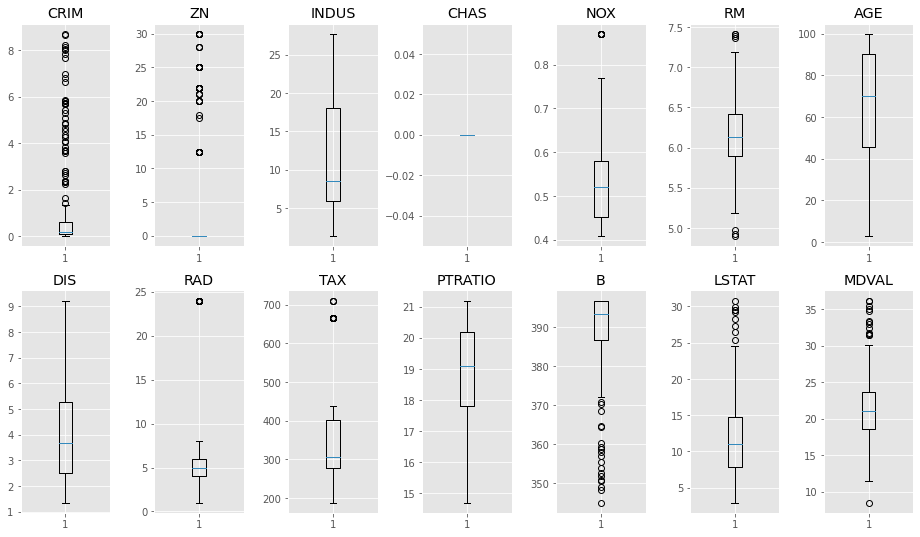

In [97]:
#Creating boxplots
plt.style.use('ggplot')
plt.figure(figsize=(16,9))
for i,j in enumerate(data1.columns):
    plt.subplot(2,7,i+1)
    plt.boxplot(data1[j]);
    plt.title(j)
plt.subplots_adjust(wspace=0.5)

In [99]:
#Checking data shape
data1.shape

(268, 14)